In [1]:
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

from src.votekit.ballot_generator import ImpartialCulture, ImpartialAnonymousCulture 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from math import factorial

['/home/willithg/MGGG/VoteKit', '/home/willithg/miniconda3/lib/python312.zip', '/home/willithg/miniconda3/lib/python3.12', '/home/willithg/miniconda3/lib/python3.12/lib-dynload', '', '/home/willithg/miniconda3/lib/python3.12/site-packages']


In [2]:
num_cands = 20
cands = [f"{i}" for i in range(num_cands)]
#iac = ImpartialAnonymousCulture(candidates=cands)
ic_uncached = ImpartialCulture(candidates=cands)
ic_cached = ImpartialCulture(candidates = cands, use_total_ballots_cache=True)

use_cache: False
yee1: True
use_cache: True


In [ ]:
#iac.generate_profile(number_of_ballots=1000, use_optimized=True)
num_ballots = 100_00
#%timeit -n 3 -r 1 
%timeit -n 2 -r 1 ic_uncached.generate_profile(number_of_ballots=num_ballots, use_optimized=True, allow_short_ballots=True)
%timeit -n 2 -r 1 ic_cached.generate_profile(number_of_ballots=num_ballots, use_optimized=True, allow_short_ballots=True)

1.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)
1.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)
{(20, 20): 6613313319248080000, (21, 21): 138879579704209680021, (19, 20): 330665665962403999, (18, 20): 17403456103284420, (17, 20): 966858672404689, (16, 20): 56874039553216, (15, 20): 3554627472075, (14, 20): 236975164804, (13, 20): 16926797485, (12, 20): 1302061344, (11, 20): 108505111, (10, 20): 9864100, (9, 20): 986409, (8, 20): 109600, (7, 20): 13699, (6, 20): 1956, (5, 20): 325, (4, 20): 64, (3, 20): 15, (2, 20): 4, (1, 20): 1}


### Gather runtime data for ic draws, cached vs uncached

In [4]:
# create some instances of ic vs iac
# average some runs
num_ballots = [100, 1_000, 10_000, 50_000, 100_000]
uncached_times = [-1 for _ in range(len(num_ballots))]
cached_times = [-1 for _ in range(len(num_ballots))]
for i, ballot_size in enumerate(num_ballots):
    cache_run = %timeit -o -n 3 -r 1 ic_cached.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    uncached_run = %timeit -o -n 3 -r 1 ic_uncached.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    
    cached_times[i] = cache_run.average
    uncached_times[i] = uncached_run.average


54.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
20.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
123 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
1.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
1.13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
5.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
5.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
10.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
11.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


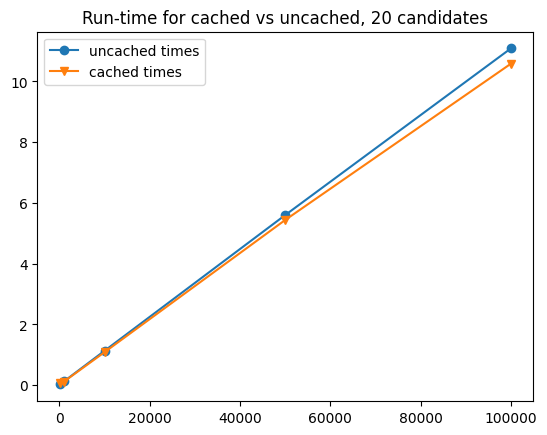

In [7]:
plt.plot(num_ballots, uncached_times, label="uncached times", marker="o")
plt.plot(num_ballots, cached_times, label="cached times", marker="v")
plt.xlabel="number of ballots"
plt.ylabel="run time (s)"
plt.title(f"Run-time for cached vs uncached, {num_cands} candidates")
plt.legend()
plt.show()